In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
results = pd.read_csv('/Users/miasager/Desktop/QTM151/final_project/data_raw/results.csv')
races = pd.read_csv('/Users/miasager/Desktop/QTM151/final_project/data_raw/races.csv')
drivers = pd.read_csv('/Users/miasager/Desktop/QTM151/final_project/data_raw/drivers.csv')

In [59]:
(results.head())


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [60]:
(races.head())

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [61]:
(drivers.head())

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [62]:
merged = pd.merge(results, drivers[['driverId', 'nationality']], on='driverId')

merged = pd.merge(merged, races[['raceId', 'year']], on='raceId')
merged

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,nationality,year
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,British,2008
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,German,2008
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,German,2008
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Spanish,2008
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finnish,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11,German,2022
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11,Danish,2022
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9,British,2022
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130,Canadian,2022


In [63]:
merged = merged[['points', 'year', 'nationality', 'driverId', 'positionText', 'milliseconds']]
merged = merged[merged['points'] > 0]

merged2 = merged.dropna(subset=['points', 'year', 'nationality', 'driverId', 'positionText', 'milliseconds'])
merged2

merged2.rename(columns= {'positionText' : 'position'} )


,points,year,nationality,driverId,position,milliseconds
0,10.0,2008,British,1,1,5690616
1,8.0,2008,German,2,2,5696094
2,6.0,2008,German,3,3,5698779
3,5.0,2008,Spanish,4,4,5707797
4,4.0,2008,Finnish,5,5,5708630
...,...,...,...,...,...,...
25825,9.0,2022,British,846,6,5322148
25826,6.0,2022,French,839,7,5323154
25827,4.0,2022,Canadian,840,8,5342845
25828,2.0,2022,Australian,817,9,5349182


In [70]:
merged_agg =merged2.groupby("nationality").agg(mean_points = ("points","mean"),
                                               len_nation = ("nationality", len)).sort_values(by = "len_nation", ascending = False).reset_index()
merged_agg

,nationality,len_nation
0,British,1460
1,German,1011
2,French,772
3,Brazilian,636
4,Italian,586
5,Finnish,530
6,Spanish,361
7,Australian,338
8,American,254
9,Austrian,218


In [76]:
grouped2 = merged.groupby(['year', 'nationality']).agg(
    total_points=('points', 'sum'))

grouped2

total_points
year nationality              
1950 American             24.0
     Argentine            27.0
     British               8.0
     French               26.0
     Italian              74.0
...                        ...
2022 Japanese             12.0
     Mexican             291.0
     Monegasque          291.0
     Spanish             309.0
     Thai                  4.0

[746 rows x 1 columns]

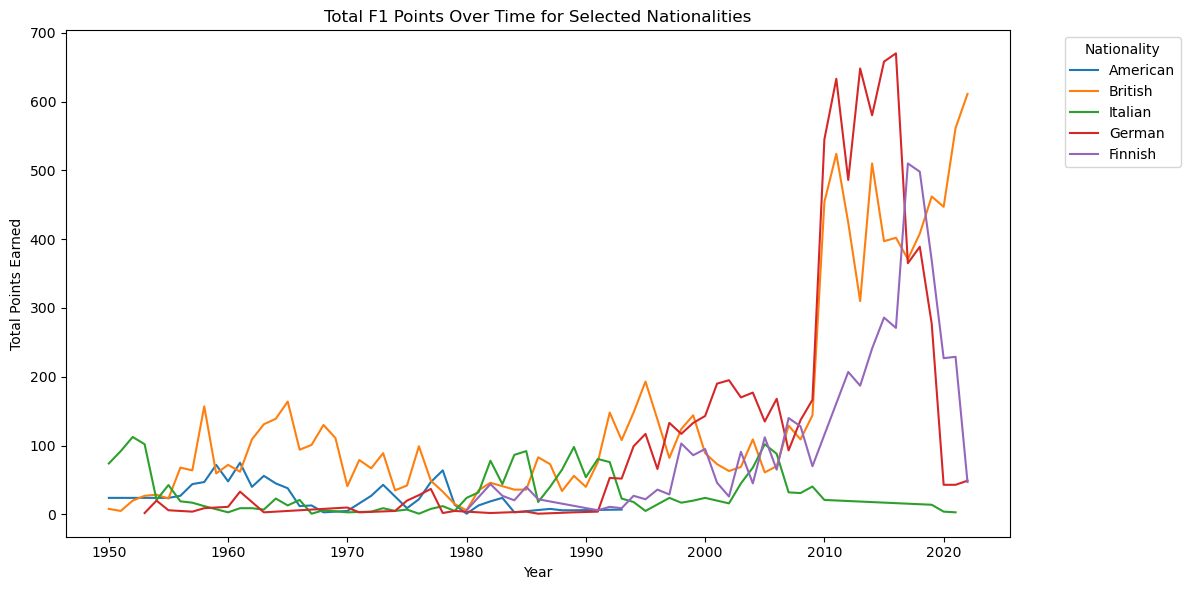

In [87]:
grouped2 = merged2.groupby(['year', 'nationality']).agg(
    total_points=('points', 'sum')).reset_index()

selected_countries = [
    'British', 'German',  'Italian', 'Finnish', 'American'
]

grouped2_filtered = grouped2[grouped2['nationality'].isin(selected_countries)]

# line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped2_filtered, x='year', y='total_points', hue='nationality')
plt.title("Total F1 Points Over Time for Selected Nationalities")
plt.xlabel("Year")
plt.ylabel("Total Points Earned")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [89]:
grouped3 = merged.groupby(['nationality']).agg(
    total_points=('points', 'sum')).sort_values(by='total_points', ascending=False).reset_index()

grouped3

,nationality,total_points
0,British,10566.64
1,German,7946.50
2,Finnish,4378.50
3,French,3463.33
4,Brazilian,3423.00
5,Spanish,2906.50
6,Australian,2828.50
7,Italian,2041.66
8,Dutch,2012.50
9,Mexican,1281.00


KeyError: 'nationality'

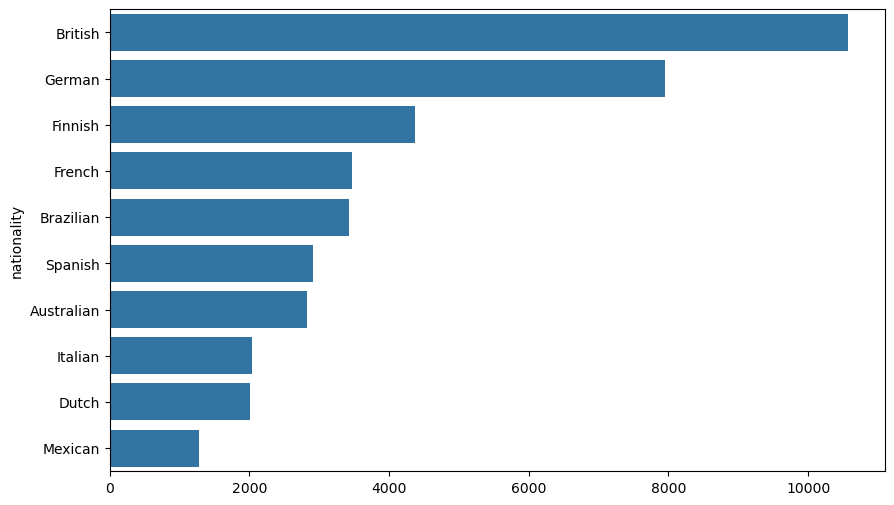

In [92]:
grouped3 = grouped2.groupby('nationality')['total_points'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped3.values, y=grouped3.index)
plt.hist(x = grouped3['nationality'], y = grouped3['total_points'])